In [1]:
from IPython.display import Image

----------------
## PANDAS - Apply, map, applymap
------------


`examples` of how apply iterates through a DataFrame. 

- Either column by column, or row by row.

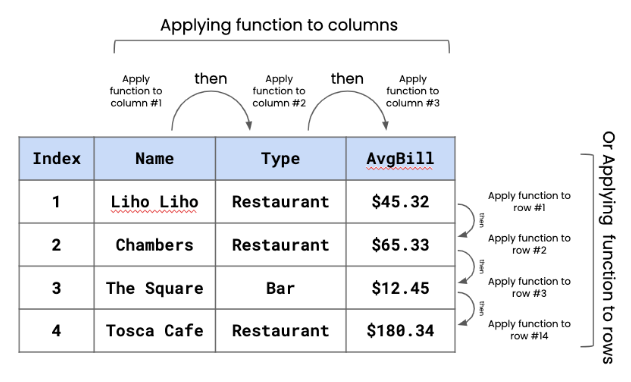

In [2]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\pd-apply-map-00.PNG', width=600)

`Note` : When `apply` “receives” a column or a row, it’s actually receiving a `series of data`, not a list. So when we’re working with `custom functions`, make sure we treat data with it’s index.

##### Apply

- `func`: The function to apply to each row or column of the DataFrame.
- `axis`: axis along which the function is applied. The possible values are {0 or ‘index’, 1 or ‘columns’}, default 0.
- `args`: The positional arguments to pass to the function. This is helpful when we have to pass additional arguments to the function.
- `kwargs`: additional keyword arguments to pass to the function. This is helpful when we have to pass additional keyword arguments to the function.

In [3]:
import numpy as np
import pandas as pd

`Applying a Function to DataFrame Elements`

In [4]:
df = pd.DataFrame({'A': [1,  2,  3], 
                   'B': [10, 20, 30]})
df

,A,B
0,1,10
1,2,20
2,3,30


In [5]:
def square(x):
    return x * x

In [8]:
df.apply(square)

,A,B
0,1,100
1,4,400
2,9,900


In [9]:
df

,A,B
0,1,10
1,2,20
2,3,30


- The DataFrame on which `apply()` function is called remains `unchanged`. 

- The apply() function returns a `new DataFrame` object after applying the function to its elements.

`apply() with lambda`

We can easily convert the `square` fn into a `lambda function`. We can create a lambda function while calling the apply() function.



In [10]:
df.apply(lambda x: x * x)

,A,B
0,1,100
1,4,400
2,9,900


`apply() along axis`

- We can apply a function along the axis. 
    - in the last example, there is `no use of the axis`. The function is being applied to `all the elements` of the DataFrame.

- The use of axis becomes clear when we call an aggregate function on the DataFrame rows or columns. 

- Let’s say we want to get the `sum` of elements along the `columns` or `indexes`. The output will be different based on the value of the axis argument.

In [11]:
df = pd.DataFrame({'A': [1,  2,  3, 4, 5, 6, 7], 
                   'B': [10, 20, 30,40,50,60,70]})
df

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70


In [11]:
df.apply(np.sum, axis=0)

A     28
B    280
dtype: int64

In [12]:
df.apply(np.sum, axis=1)

0    11
1    22
2    33
3    44
4    55
5    66
6    77
dtype: int64

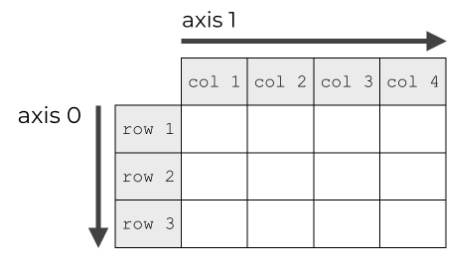

In [13]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\np-14.PNG', width=300)

`DataFrame apply() with arguments`

- Let’s say we want to apply a function that accepts more than one parameter. In that case, we can pass the additional parameters using the `args` argument.

In [12]:
def sum(x, y, z):
    return x + y + z

In [13]:
df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})
df

,A,B
0,1,10
1,2,20


In [12]:
df.apply(sum, args=(1, 2), axis=0)

,A,B
0,4,13
1,5,23


In [18]:
s = pd.Series([20, 21, 12],
              index=['London', 'New York', 'Helsinki'])

In [19]:
s

London      20
New York    21
Helsinki    12
dtype: int64

In [20]:
def subtract_custom_value(x, custom_value):
    return x - custom_value

In [21]:
s.apply(subtract_custom_value, args=(5,))

London      15
New York    16
Helsinki     7
dtype: int64

- x = element from datafram along the axis mentioned

- y = passed argument 1
- z = passed argument 2

`DataFrame apply() with positional and keyword arguments`

- Let’s look at an example where we will use both ‘args’ and ‘kwargs’ parameters to pass positional and keyword arguments to the function.

In [13]:
def sum(x, y, z, m):
    return (x + y + z) * m


df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})
df

,A,B
0,1,10
1,2,20


In [14]:
df.apply(sum, args=(1, 2), m=10)   # axis=0 is implicit here

,A,B
0,40,130
1,50,230


#### Map 

- Map External Values

In [15]:
raw_data = {'first_name': ['Shubham', 'Chaya',  'Molly', 'Virender', 'Manoj'], 
            'last_name':  ['Paul',    'Bamola', 'Sarin', 'Malhotra', 'Agrawal'], 
            'age':        [42, 52, 36, 24, 73], 
            'city':       ['Durgapur', 'Bangalore', 'Kolkata', 'Mumbai', 'Patna']}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'city'])
df

,first_name,last_name,age,city
0,Shubham,Paul,42,Durgapur
1,Chaya,Bamola,52,Bangalore
2,Molly,Sarin,36,Kolkata
3,Virender,Malhotra,24,Mumbai
4,Manoj,Agrawal,73,Patna


##### Create a dictionary of values

In [16]:
city_to_state = { 'Durgapur'  : 'West Bengal', 
                  'Bangalore' : 'Karnataka', 
                  'Kolkata'   : 'West Bengal', 
                  'Mumbai'    : 'Maharastra', 
                  'Patna'     : 'Bihar'}

In [17]:
df['state'] = df['city'].map(city_to_state)
df

,first_name,last_name,age,city,state
0,Shubham,Paul,42,Durgapur,West Bengal
1,Chaya,Bamola,52,Bangalore,Karnataka
2,Molly,Sarin,36,Kolkata,West Bengal
3,Virender,Malhotra,24,Mumbai,Maharastra
4,Manoj,Agrawal,73,Patna,Bihar


#### More examples on apply/map

In [18]:
url = 'http://bit.ly/kaggletrain'       # titanic data
train = pd.read_csv(url)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


`map() function as a Series method`

- Mostly used for mapping `categorical` data to `numerical` data

In [33]:
# create new column
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})

# let's compare Sex and Sex_num columns
# here we can see we map male to 1 and female to 0
train.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


`apply() function as a Series method`
- Applies a `function` to each element in the Series

`Ex` say we want to calculate `length` of string in each string in "Name" column

- create new column
- we are applying Python's len function

In [34]:
train['Name_length'] = train.Name.apply(len)

In [35]:
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


`Ex` - say we look at the "Fare" column and we want to round it up we will use numpy's `ceil` function to round up the numbers


In [36]:
train['Fare_ceil'] = train.Fare.apply(np.ceil)

In [37]:
train.loc[0:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


`apply() function as a DataFrame method`
- Applies a function on either axis of the DataFrame

In [38]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [39]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)     # column wise, downwards

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [40]:
drinks.loc[:, ['beer_servings', 'wine_servings']].apply(max, axis=0)     # column wise, downwards

beer_servings    376
wine_servings    370
dtype: int64

In [41]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1)       # row, right

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64